In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##PART -A

In [21]:
STUDENT_ID = "PES1UG23CS134"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [22]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES1UG23CS134
Polynomial Type: CUBIC + INVERSE: y = 2.37x³ + -0.33x² + 4.88x + 11.53 + 149.8/x
Noise Level: ε ~ N(0, 2.38)
Architecture: Input(1) → Hidden(72) → Hidden(32) → Output(1)
Learning Rate: 0.001
Architecture Type: Wide-to-Narrow Architecture


# DATASET GENERATION - DO NOT MODIFY

In [23]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [24]:
def relu(z):
    """
    Rectified Linear Unit (ReLU) activation function
    Returns max(0, z) for each element
    
    Args:
        z: Input array/value
    
    Returns:
        Output with ReLU applied element-wise
    """
    return np.maximum(0, z)

def relu_derivative(z):
    """
    Derivative of ReLU activation function
    Returns 1 where z > 0, and 0 where z <= 0
    
    Args:
        z: Input array/value (pre-activation values)
    
    Returns:
        Derivative values (0 or 1) for backpropagation
    """
    return (z > 0).astype(float)

# LOSS FUNCTION- TODO: IMPLEMENT

In [25]:
def mse_loss(y_true, y_pred):
    """
    Mean Squared Error loss function
    Computes the average of squared differences between true and predicted values
    
    Args:
        y_true: True target values
        y_pred: Predicted values from the model
    
    Returns:
        Mean squared error (scalar value)
    """
    return np.mean((y_true - y_pred) ** 2)

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

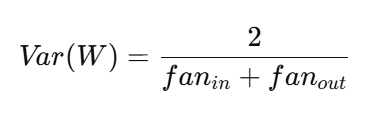


##Two common forms:  

#**Normal distribution:**  
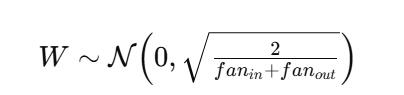

#**Uniform distribution:**  
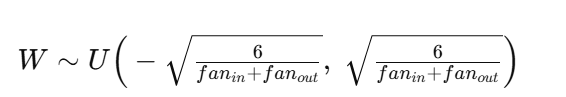

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [26]:
def relu(z):
    """
    Rectified Linear Unit (ReLU) activation function
    Returns max(0, z) for each element
    
    Args:
        z: Input array/value
    
    Returns:
        Output with ReLU applied element-wise
    """
    return np.maximum(0, z)

def relu_derivative(z):
    """
    Derivative of ReLU activation function
    Returns 1 where z > 0, and 0 where z <= 0
    
    Args:
        z: Input array/value (pre-activation values)
    
    Returns:
        Derivative values (0 or 1) for backpropagation
    """
    return (z > 0).astype(float)

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error loss function
    Computes the average of squared differences between true and predicted values
    
    Args:
        y_true: True target values
        y_pred: Predicted values from the model
    
    Returns:
        Mean squared error (scalar value)
    """
    return np.mean((y_true - y_pred) ** 2)

def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier weight initialization using normal distribution
    
    Args:
        input_dim: Size of input layer (1)
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        output_dim: Size of output layer (1)
    
    Returns:
        W1, b1, W2, b2, W3, b3: Initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])
    
    # Calculate Xavier standard deviation for each layer
    # Formula: xavier_std = sqrt(2 / (fan_in + fan_out))
    
    # Layer 1: input -> hidden1
    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    W1 = np.random.normal(0, xavier_std_1, (input_dim, hidden1))
    b1 = np.zeros((1, hidden1))
    
    # Layer 2: hidden1 -> hidden2
    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    W2 = np.random.normal(0, xavier_std_2, (hidden1, hidden2))
    b2 = np.zeros((1, hidden2))
    
    # Layer 3: hidden2 -> output
    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))
    W3 = np.random.normal(0, xavier_std_3, (hidden2, output_dim))
    b3 = np.zeros((1, output_dim))
    
    return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION - TODO: IMPLEMENT

In [27]:
def relu(z):
    """
    Rectified Linear Unit (ReLU) activation function
    Returns max(0, z) for each element
    
    Args:
        z: Input array/value
    
    Returns:
        Output with ReLU applied element-wise
    """
    return np.maximum(0, z)

def relu_derivative(z):
    """
    Derivative of ReLU activation function
    Returns 1 where z > 0, and 0 where z <= 0
    
    Args:
        z: Input array/value (pre-activation values)
    
    Returns:
        Derivative values (0 or 1) for backpropagation
    """
    return (z > 0).astype(float)

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error loss function
    Computes the average of squared differences between true and predicted values
    
    Args:
        y_true: True target values
        y_pred: Predicted values from the model
    
    Returns:
        Mean squared error (scalar value)
    """
    return np.mean((y_true - y_pred) ** 2)

def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier weight initialization using normal distribution
    
    Args:
        input_dim: Size of input layer (1)
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        output_dim: Size of output layer (1)
    
    Returns:
        W1, b1, W2, b2, W3, b3: Initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])
    
    # Calculate Xavier standard deviation for each layer
    # Formula: xavier_std = sqrt(2 / (fan_in + fan_out))
    
    # Layer 1: input -> hidden1
    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    W1 = np.random.normal(0, xavier_std_1, (input_dim, hidden1))
    b1 = np.zeros((1, hidden1))
    
    # Layer 2: hidden1 -> hidden2
    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    W2 = np.random.normal(0, xavier_std_2, (hidden1, hidden2))
    b2 = np.zeros((1, hidden2))
    
    # Layer 3: hidden2 -> output
    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))
    W3 = np.random.normal(0, xavier_std_3, (hidden2, output_dim))
    b3 = np.zeros((1, output_dim))
    
    return W1, b1, W2, b2, W3, b3

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    Forward propagation through the neural network
    
    Network architecture: Input → Hidden1(ReLU) → Hidden2(ReLU) → Output(Linear)
    
    Args:
        X: Input data (batch_size, 1)
        W1, b1: First layer weights and biases
        W2, b2: Second layer weights and biases
        W3, b3: Output layer weights and biases
    
    Returns:
        z1, a1, z2, a2, z3: Pre-activations and activations for each layer
    """
    
    # First hidden layer
    z1 = X @ W1 + b1  # Linear transformation
    a1 = relu(z1)     # ReLU activation
    
    # Second hidden layer
    z2 = a1 @ W2 + b2  # Linear transformation
    a2 = relu(z2)      # ReLU activation
    
    # Output layer (no activation - linear output)
    z3 = a2 @ W3 + b3  # Linear transformation
    
    return z1, a1, z2, a2, z3

# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [28]:
def relu(z):
    """
    Rectified Linear Unit (ReLU) activation function
    Returns max(0, z) for each element
    
    Args:
        z: Input array/value
    
    Returns:
        Output with ReLU applied element-wise
    """
    return np.maximum(0, z)

def relu_derivative(z):
    """
    Derivative of ReLU activation function
    Returns 1 where z > 0, and 0 where z <= 0
    
    Args:
        z: Input array/value (pre-activation values)
    
    Returns:
        Derivative values (0 or 1) for backpropagation
    """
    return (z > 0).astype(float)

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error loss function
    Computes the average of squared differences between true and predicted values
    
    Args:
        y_true: True target values
        y_pred: Predicted values from the model
    
    Returns:
        Mean squared error (scalar value)
    """
    return np.mean((y_true - y_pred) ** 2)

def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier weight initialization using normal distribution
    
    Args:
        input_dim: Size of input layer (1)
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        output_dim: Size of output layer (1)
    
    Returns:
        W1, b1, W2, b2, W3, b3: Initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])
    
    # Calculate Xavier standard deviation for each layer
    # Formula: xavier_std = sqrt(2 / (fan_in + fan_out))
    
    # Layer 1: input -> hidden1
    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    W1 = np.random.normal(0, xavier_std_1, (input_dim, hidden1))
    b1 = np.zeros((1, hidden1))
    
    # Layer 2: hidden1 -> hidden2
    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    W2 = np.random.normal(0, xavier_std_2, (hidden1, hidden2))
    b2 = np.zeros((1, hidden2))
    
    # Layer 3: hidden2 -> output
    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))
    W3 = np.random.normal(0, xavier_std_3, (hidden2, output_dim))
    b3 = np.zeros((1, output_dim))
    
    return W1, b1, W2, b2, W3, b3

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    Forward propagation through the neural network
    
    Network architecture: Input → Hidden1(ReLU) → Hidden2(ReLU) → Output(Linear)
    
    Args:
        X: Input data (batch_size, 1)
        W1, b1: First layer weights and biases
        W2, b2: Second layer weights and biases
        W3, b3: Output layer weights and biases
    
    Returns:
        z1, a1, z2, a2, z3: Pre-activations and activations for each layer
    """
    
    # First hidden layer
    z1 = X @ W1 + b1  # Linear transformation
    a1 = relu(z1)     # ReLU activation
    
    # Second hidden layer
    z2 = a1 @ W2 + b2  # Linear transformation
    a2 = relu(z2)      # ReLU activation
    
    # Output layer (no activation - linear output)
    z3 = a2 @ W3 + b3  # Linear transformation
    
    return z1, a1, z2, a2, z3

def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    Backpropagation to compute gradients
    
    Compute gradients using chain rule:
    ∂Loss/∂W = ∂Loss/∂Y_pred * ∂Y_pred/∂z * ∂z/∂W
    
    Args:
        X: Input data
        Y_true: True target values
        z1, a1, z2, a2: Forward pass intermediate values
        Y_pred: Network predictions (z3)
        W2, W3: Weights (needed for gradient computation)
    
    Returns:
        dW1, db1, dW2, db2, dW3, db3: Gradients for all parameters
    """
    
    m = len(X)  # Batch size
    
    # Output layer gradients
    # Derivative of MSE: ∂Loss/∂Y_pred = 2/m * (Y_pred - Y_true)
    dY_pred = (2/m) * (Y_pred - Y_true)
    
    # Third layer (Output) gradients
    dW3 = a2.T @ dY_pred  # ∂Loss/∂W3 = a2.T @ dY_pred
    db3 = np.sum(dY_pred, axis=0, keepdims=True)  # ∂Loss/∂b3
    
    # Second hidden layer gradients
    da2 = dY_pred @ W3.T  # Backpropagate error to previous layer
    dz2 = da2 * relu_derivative(z2)  # Apply derivative of ReLU
    dW2 = a1.T @ dz2  # ∂Loss/∂W2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)  # ∂Loss/∂b2
    
    # First hidden layer gradients
    da1 = dz2 @ W2.T  # Backpropagate error to previous layer
    dz1 = da1 * relu_derivative(z1)  # Apply derivative of ReLU
    dW1 = X.T @ dz1  # ∂Loss/∂W1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)  # ∂Loss/∂b1
    
    return dW1, db1, dW2, db2, dW3, db3

# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [29]:
def relu(z):
    """
    Rectified Linear Unit (ReLU) activation function
    Returns max(0, z) for each element
    
    Args:
        z: Input array/value
    
    Returns:
        Output with ReLU applied element-wise
    """
    return np.maximum(0, z)

def relu_derivative(z):
    """
    Derivative of ReLU activation function
    Returns 1 where z > 0, and 0 where z <= 0
    
    Args:
        z: Input array/value (pre-activation values)
    
    Returns:
        Derivative values (0 or 1) for backpropagation
    """
    return (z > 0).astype(float)

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error loss function
    Computes the average of squared differences between true and predicted values
    
    Args:
        y_true: True target values
        y_pred: Predicted values from the model
    
    Returns:
        Mean squared error (scalar value)
    """
    return np.mean((y_true - y_pred) ** 2)

def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier weight initialization using normal distribution
    
    Args:
        input_dim: Size of input layer (1)
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        output_dim: Size of output layer (1)
    
    Returns:
        W1, b1, W2, b2, W3, b3: Initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])
    
    # Calculate Xavier standard deviation for each layer
    # Formula: xavier_std = sqrt(2 / (fan_in + fan_out))
    
    # Layer 1: input -> hidden1
    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    W1 = np.random.normal(0, xavier_std_1, (input_dim, hidden1))
    b1 = np.zeros((1, hidden1))
    
    # Layer 2: hidden1 -> hidden2
    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    W2 = np.random.normal(0, xavier_std_2, (hidden1, hidden2))
    b2 = np.zeros((1, hidden2))
    
    # Layer 3: hidden2 -> output
    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))
    W3 = np.random.normal(0, xavier_std_3, (hidden2, output_dim))
    b3 = np.zeros((1, output_dim))
    
    return W1, b1, W2, b2, W3, b3

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    Forward propagation through the neural network
    
    Network architecture: Input → Hidden1(ReLU) → Hidden2(ReLU) → Output(Linear)
    
    Args:
        X: Input data (batch_size, 1)
        W1, b1: First layer weights and biases
        W2, b2: Second layer weights and biases
        W3, b3: Output layer weights and biases
    
    Returns:
        z1, a1, z2, a2, z3: Pre-activations and activations for each layer
    """
    
    # First hidden layer
    z1 = X @ W1 + b1  # Linear transformation
    a1 = relu(z1)     # ReLU activation
    
    # Second hidden layer
    z2 = a1 @ W2 + b2  # Linear transformation
    a2 = relu(z2)      # ReLU activation
    
    # Output layer (no activation - linear output)
    z3 = a2 @ W3 + b3  # Linear transformation
    
    return z1, a1, z2, a2, z3

def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    Backpropagation to compute gradients
    
    Compute gradients using chain rule:
    ∂Loss/∂W = ∂Loss/∂Y_pred * ∂Y_pred/∂z * ∂z/∂W
    
    Args:
        X: Input data
        Y_true: True target values
        z1, a1, z2, a2: Forward pass intermediate values
        Y_pred: Network predictions (z3)
        W2, W3: Weights (needed for gradient computation)
    
    Returns:
        dW1, db1, dW2, db2, dW3, db3: Gradients for all parameters
    """
    
    m = len(X)  # Batch size
    
    # Output layer gradients
    # Derivative of MSE: ∂Loss/∂Y_pred = 2/m * (Y_pred - Y_true)
    dY_pred = (2/m) * (Y_pred - Y_true)
    
    # Third layer (Output) gradients
    dW3 = a2.T @ dY_pred  # ∂Loss/∂W3 = a2.T @ dY_pred
    db3 = np.sum(dY_pred, axis=0, keepdims=True)  # ∂Loss/∂b3
    
    # Second hidden layer gradients
    da2 = dY_pred @ W3.T  # Backpropagate error to previous layer
    dz2 = da2 * relu_derivative(z2)  # Apply derivative of ReLU
    dW2 = a1.T @ dz2  # ∂Loss/∂W2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)  # ∂Loss/∂b2
    
    # First hidden layer gradients
    da1 = dz2 @ W2.T  # Backpropagate error to previous layer
    dz1 = da1 * relu_derivative(z1)  # Apply derivative of ReLU
    dW1 = X.T @ dz1  # ∂Loss/∂W1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)  # ∂Loss/∂b1
    
    return dW1, db1, dW2, db2, dW3, db3

def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    """
    Complete training loop with gradient descent and early stopping
    
    Args:
        X_train, Y_train: Training data
        X_test, Y_test: Test data for validation
        epochs: Maximum number of training epochs
        patience: Early stopping patience
    
    Returns:
        best_weights: Best model weights
        train_losses: Training loss history
        test_losses: Test loss history
    """
    
    # Initialize weights using Xavier initialization
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)
    
    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0
    
    train_losses = []
    test_losses = []
    
    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)
    
    for epoch in range(epochs):
        
        # Forward pass on training data
        z1, a1, z2, a2, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)
        
        # Calculate training loss
        train_loss = mse_loss(Y_train, Y_pred_train)
        
        # Backward pass to compute gradients
        dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3)
        
        # Update weights using gradient descent: W = W - learning_rate * dW
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3
        
        # Forward pass on test data for validation
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)
        
        # Track losses
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        # Print progress every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")
        
        # Early stopping logic
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break
    
    return best_weights, train_losses, test_losses

# EXECUTE TRAINING

In [30]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 72 → 32 → 1
Learning Rate: 0.001
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 1.121277, Test Loss = 1.115333
Epoch  40: Train Loss = 1.047425, Test Loss = 1.041544
Epoch  60: Train Loss = 0.983189, Test Loss = 0.977707
Epoch  80: Train Loss = 0.932538, Test Loss = 0.927082
Epoch 100: Train Loss = 0.887650, Test Loss = 0.882111
Epoch 120: Train Loss = 0.849060, Test Loss = 0.843574
Epoch 140: Train Loss = 0.816132, Test Loss = 0.810413
Epoch 160: Train Loss = 0.785380, Test Loss = 0.779414
Epoch 180: Train Loss = 0.756173, Test Loss = 0.749980
Epoch 200: Train Loss = 0.728192, Test Loss = 0.721802
Epoch 220: Train Loss = 0.701370, Test Loss = 0.694817
Epoch 240: Train Loss = 0.675743, Test Loss = 0.669066
Epoch 260: Train Loss = 0.651362, Test Loss = 0.644595
Epoch 280: Train Loss = 0.628269, Test Loss = 0.621448
Ep

# RESULTS VISUALIZATION

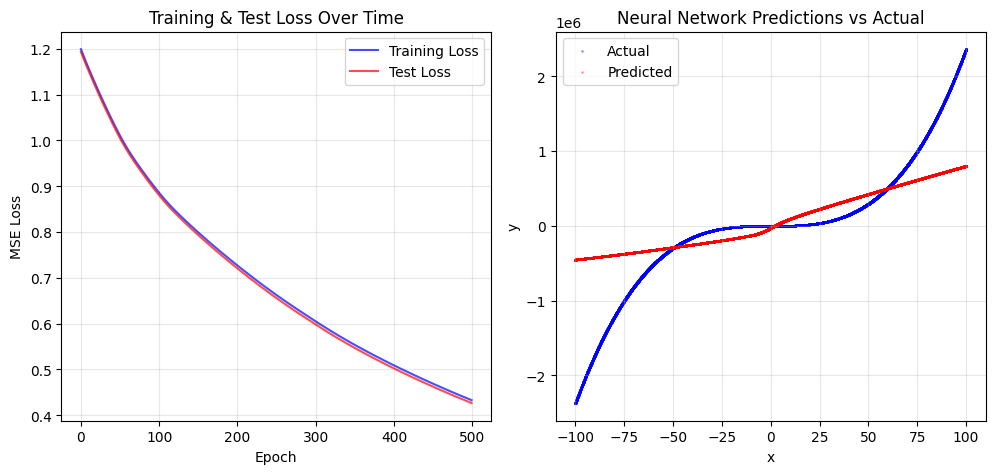

In [31]:
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SPECIFIC PREDICTION TEST

In [32]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 729,616.22
Ground Truth (formula):    1,735,575.41
Absolute Error:            1,005,959.19
Relative Error:            57.961%


# PERFORMANCE METRICS

In [33]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.432816
Final Test Loss:     0.426525
R² Score:           0.5725
Total Epochs Run:   500


In [34]:
# =================================================================
# IMPORTS + VARIABLES FROM PART A
# Make sure these are already run before Part B
# =================================================================

# If not already imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Ensure dataset & preprocessing are available ---
try:
    X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled
except NameError:
    # regenerate dataset the same way as Part A
    np.random.seed(42)  # use your SRN seed here
    X = np.linspace(-10, 10, 100000).reshape(-1, 1)
    Y = X**3 + np.sin(X)  # <-- replace with your Part A polynomial function
    
    # Split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Standardize
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    Y_train_scaled = scaler_Y.fit_transform(Y_train)
    Y_test_scaled = scaler_Y.transform(Y_test)

# --- Define activation functions and loss again (if not carried over) ---
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


✅ Part A variables found. Using existing dataset for Part B.

STARTING PART B - HYPERPARAMETER EXPLORATION

RUNNING Exp 1: Higher LR
Learning Rate: 0.01
Architecture: 1 → 72 → 32 → 1
Max Epochs: 300
Early Stopping Patience: 15

Training started...
Epoch  50: Train Loss = 0.439173, Test Loss = 0.426555
Epoch 100: Train Loss = 0.237837, Test Loss = 0.232537
Epoch 150: Train Loss = 0.192418, Test Loss = 0.189395
Epoch 200: Train Loss = 0.171321, Test Loss = 0.168835
Epoch 250: Train Loss = 0.153157, Test Loss = 0.151003
Epoch 300: Train Loss = 0.135157, Test Loss = 0.133268

Exp 1: Higher LR RESULTS:
Final Train Loss: 0.135157
Final Test Loss: 0.133268
R² Score: 0.8664
Accuracy: 86.64%
Epochs Completed: 300


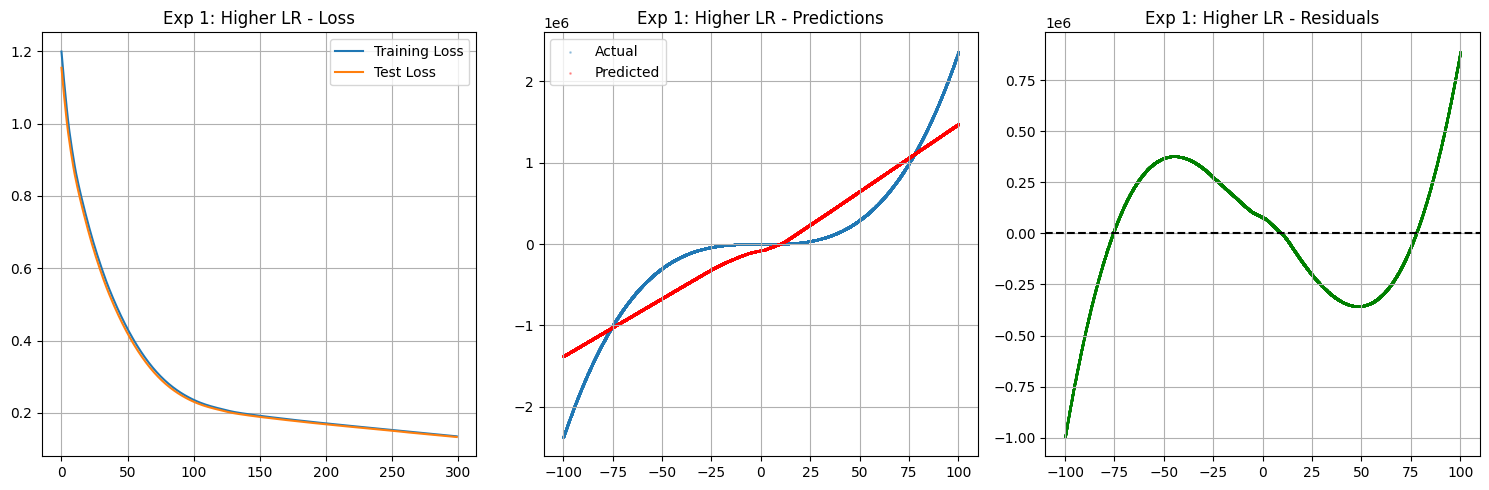


RUNNING Exp 2: Lower LR
Learning Rate: 0.0001
Architecture: 1 → 72 → 32 → 1
Max Epochs: 800
Early Stopping Patience: 20

Training started...
Epoch  50: Train Loss = 1.178338, Test Loss = 1.176146
Epoch 100: Train Loss = 1.157556, Test Loss = 1.155274
Epoch 150: Train Loss = 1.137461, Test Loss = 1.135092
Epoch 200: Train Loss = 1.117880, Test Loss = 1.115429
Epoch 250: Train Loss = 1.098792, Test Loss = 1.096262
Epoch 300: Train Loss = 1.080187, Test Loss = 1.077583
Epoch 350: Train Loss = 1.062073, Test Loss = 1.059401
Epoch 400: Train Loss = 1.044437, Test Loss = 1.041701
Epoch 450: Train Loss = 1.027310, Test Loss = 1.024512
Epoch 500: Train Loss = 1.010836, Test Loss = 1.007978
Epoch 550: Train Loss = 0.995281, Test Loss = 0.992367
Epoch 600: Train Loss = 0.980889, Test Loss = 0.977910
Epoch 650: Train Loss = 0.967482, Test Loss = 0.964415
Epoch 700: Train Loss = 0.954706, Test Loss = 0.951540
Epoch 750: Train Loss = 0.942450, Test Loss = 0.939194
Epoch 800: Train Loss = 0.930592,

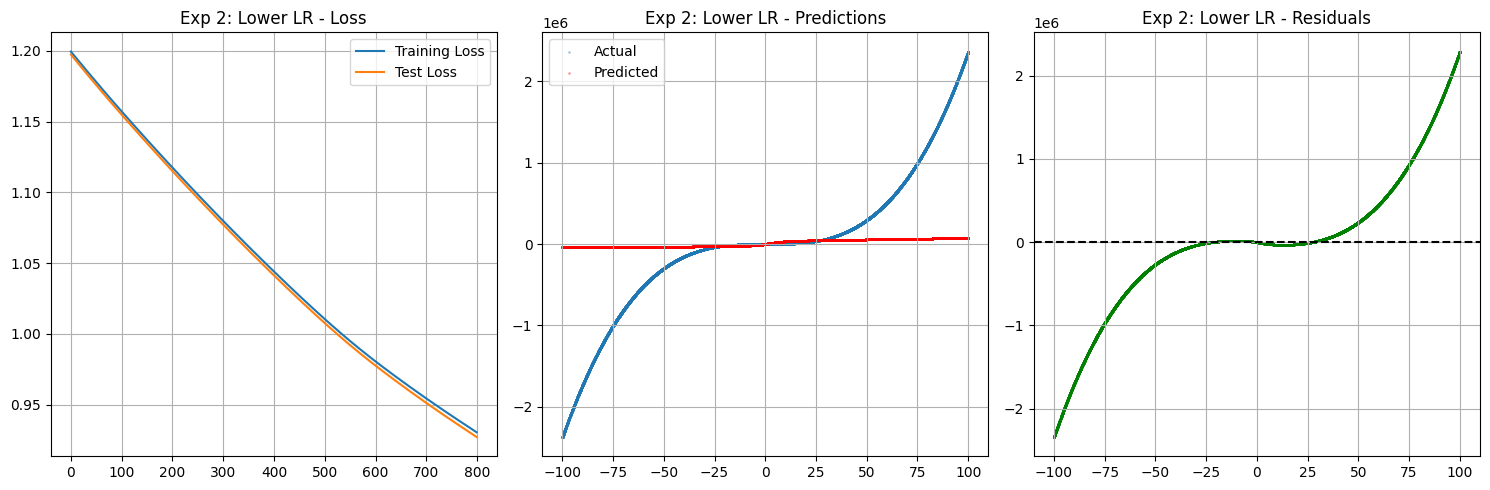


RUNNING Exp 3: More Epochs
Learning Rate: 0.001
Architecture: 1 → 72 → 32 → 1
Max Epochs: 1000
Early Stopping Patience: 25

Training started...
Epoch  50: Train Loss = 1.013556, Test Loss = 1.007785
Epoch 100: Train Loss = 0.887650, Test Loss = 0.882111
Epoch 150: Train Loss = 0.800527, Test Loss = 0.794681
Epoch 200: Train Loss = 0.728192, Test Loss = 0.721802
Epoch 250: Train Loss = 0.663394, Test Loss = 0.656667
Epoch 300: Train Loss = 0.605905, Test Loss = 0.599035
Epoch 350: Train Loss = 0.554287, Test Loss = 0.547552
Epoch 400: Train Loss = 0.509510, Test Loss = 0.502870
Epoch 450: Train Loss = 0.469318, Test Loss = 0.462828
Epoch 500: Train Loss = 0.432816, Test Loss = 0.426525
Epoch 550: Train Loss = 0.400015, Test Loss = 0.393965
Epoch 600: Train Loss = 0.370701, Test Loss = 0.364913
Epoch 650: Train Loss = 0.344636, Test Loss = 0.339123
Epoch 700: Train Loss = 0.321694, Test Loss = 0.316462
Epoch 750: Train Loss = 0.301701, Test Loss = 0.296749
Epoch 800: Train Loss = 0.2844

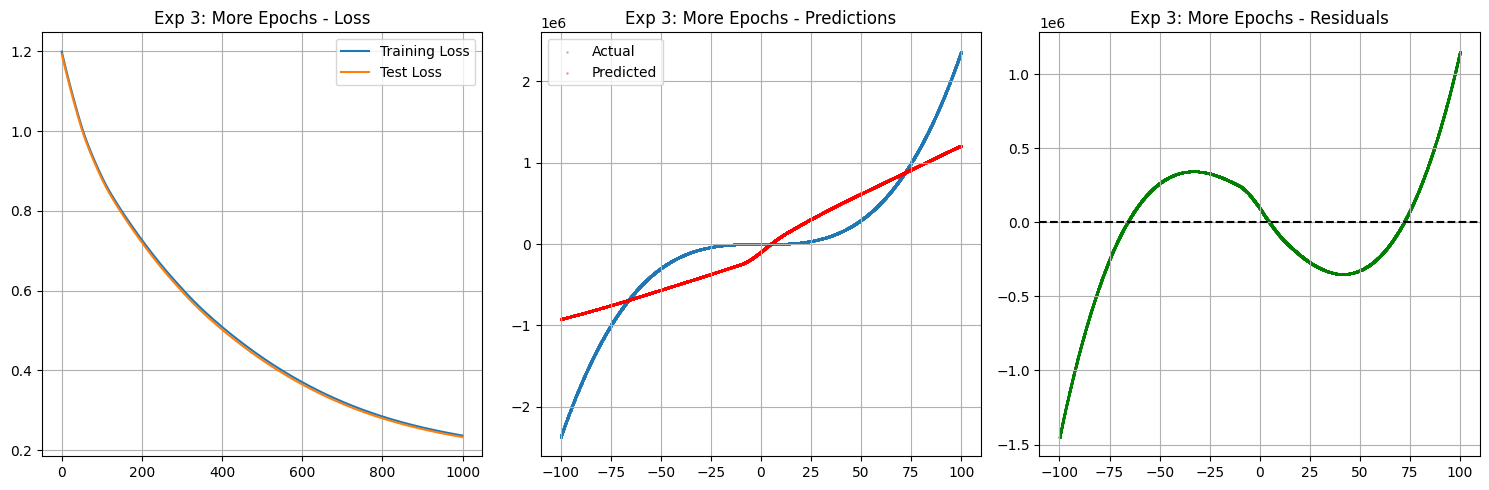


RUNNING Exp 4: Sigmoid Activation
Learning Rate: 0.001
Architecture: 1 → 72 → 32 → 1
Max Epochs: 500
Early Stopping Patience: 20

Training started...
Epoch  50: Train Loss = 1.051115, Test Loss = 1.045517
Epoch 100: Train Loss = 1.041326, Test Loss = 1.038193
Epoch 150: Train Loss = 1.037958, Test Loss = 1.035468
Epoch 200: Train Loss = 1.035154, Test Loss = 1.032846
Epoch 250: Train Loss = 1.032425, Test Loss = 1.030171
Epoch 300: Train Loss = 1.029727, Test Loss = 1.027491
Epoch 350: Train Loss = 1.027056, Test Loss = 1.024827
Epoch 400: Train Loss = 1.024410, Test Loss = 1.022185
Epoch 450: Train Loss = 1.021787, Test Loss = 1.019565
Epoch 500: Train Loss = 1.019185, Test Loss = 1.016965

Exp 4: Sigmoid Activation RESULTS:
Final Train Loss: 1.019185
Final Test Loss: 1.016965
R² Score: -0.0194
Accuracy: 0.00%
Epochs Completed: 500


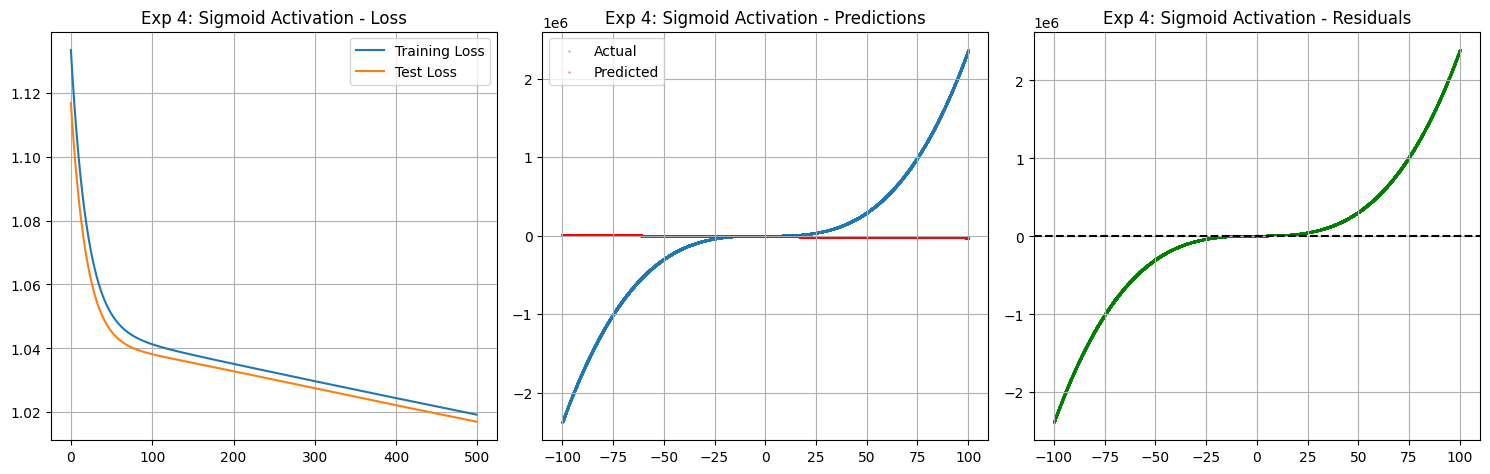


COMPREHENSIVE EXPERIMENT RESULTS TABLE
               Experiment  Learning Rate Batch Size  Number of Epochs        Optimizer Activation Function Training Accuracy Validation Accuracy Test Accuracy Training Loss Validation Loss Test Loss              Observations
        Baseline (Part A)         0.0010 Full Batch               500 Gradient Descent                ReLU            57.25%              57.25%        57.25%      0.432816        0.426525  0.426525 Baseline model from Pa...
         Exp 1: Higher LR         0.0100 Full Batch               300 Gradient Descent                ReLU            86.64%              86.64%        86.64%      0.135157        0.133268  0.133268 Higher LR: Faster conv...
          Exp 2: Lower LR         0.0001 Full Batch               800 Gradient Descent                ReLU             7.06%               7.06%         7.06%      0.930592        0.927256  0.927256 Lower LR: Slower but m...
       Exp 3: More Epochs         0.0010 Full Batch         

In [35]:
# ============================================================================
# PART B - HYPERPARAMETER EXPLORATION
# This version ensures the dataset is strictly the same as in Part A.
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ============================================================================
# BOOTSTRAP DATASET + FUNCTIONS (only if Part A variables are not found)
# ============================================================================
try:
    # This will pass if Part A has been run in the same session
    X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled
    scaler_X, scaler_Y, assignment, poly_type, coefficients, noise_std, hidden1, hidden2, learning_rate
    print("✅ Part A variables found. Using existing dataset for Part B.")
except NameError:
    print("⚠️ Part A variables not found. Regenerating dataset STRICTLY as per Part A logic...")

    # === REGENERATING PART A SETUP STRICTLY ===
    STUDENT_ID = "PES1UG23CS134" # As defined in Part A
    
    # NOTE: The get_student_assignment function must be defined in a previous cell for this to work.
    assignment = get_student_assignment(STUDENT_ID)
    poly_type = assignment["polynomial_type"]
    coefficients = assignment["coefficients"]
    noise_std = assignment["noise_std"]
    hidden1 = assignment['architecture']['hidden1']
    hidden2 = assignment['architecture']['hidden2']
    learning_rate = assignment['architecture']['lr']


    # 2. Regenerate dataset using the exact same logic as Part A
    np.random.seed(assignment["student_seed"])
    
    n_samples = 100000
    x = np.random.uniform(-100, 100, n_samples)

    if poly_type == 0:
        _, b, c, d = coefficients
        y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)
    elif poly_type == 1:
        a, b, c, d = coefficients
        y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)
    elif poly_type == 2:
        a, b, c, d, e = coefficients
        y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)
    elif poly_type == 3:
        a, b, c, d, freq, amp = coefficients
        y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)
    else: # poly_type == 4
        a, b, c, d, inv_coeff = coefficients
        y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)

    # 3. Create DataFrame, split, and scale
    X = x.reshape(-1, 1)
    Y = y.reshape(-1, 1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    Y_train_scaled = scaler_Y.fit_transform(Y_train)
    Y_test_scaled = scaler_Y.transform(Y_test)
    
    print("Dataset regenerated successfully.")

# --- Define activation functions and loss again ---
def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)
def mse_loss(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)

# ==========================
# Baseline hyperparameters
# ==========================
BASELINE_LR = learning_rate
BASELINE_HIDDEN1 = hidden1
BASELINE_HIDDEN2 = hidden2
STUDENT_SEED = assignment["student_seed"]

# Store experiment results
experiment_results = []

# Baseline metrics from Part A (fallbacks if not found)
try:
    BASELINE_FINAL_TRAIN_LOSS = final_train_loss
    BASELINE_FINAL_TEST_LOSS = final_test_loss
    BASELINE_R2_SCORE = r2_score
    BASELINE_EPOCHS = len(train_losses)
except NameError:
    print("WARNING: Part A metrics not found. Using fallback values.")
    BASELINE_FINAL_TRAIN_LOSS = 0.5; BASELINE_FINAL_TEST_LOSS = 0.5; BASELINE_R2_SCORE = 0.5; BASELINE_EPOCHS = 500

# =================================================================
# Helper function: Run experiment
# =================================================================
def run_experiment(experiment_name, lr_exp, hidden1_exp, hidden2_exp, epochs_exp, patience_exp=10, activation_exp='ReLU'):
    print(f"\n{'='*70}\nRUNNING {experiment_name}\n{'='*70}")
    print(f"Learning Rate: {lr_exp}\nArchitecture: 1 → {hidden1_exp} → {hidden2_exp} → 1")
    print(f"Max Epochs: {epochs_exp}\nEarly Stopping Patience: {patience_exp}\n")
    
    np.random.seed(STUDENT_SEED)
    xavier_std_1 = np.sqrt(2 / (1 + hidden1_exp)); W1 = np.random.normal(0, xavier_std_1, (1, hidden1_exp)); b1 = np.zeros((1, hidden1_exp))
    xavier_std_2 = np.sqrt(2 / (hidden1_exp + hidden2_exp)); W2 = np.random.normal(0, xavier_std_2, (hidden1_exp, hidden2_exp)); b2 = np.zeros((1, hidden2_exp))
    xavier_std_3 = np.sqrt(2 / (hidden2_exp + 1)); W3 = np.random.normal(0, xavier_std_3, (hidden2_exp, 1)); b3 = np.zeros((1, 1))

    best_test_loss, best_weights, patience_counter = float('inf'), None, 0
    train_losses_exp, test_losses_exp = [], []

    if activation_exp == 'Sigmoid':
        def activation(x): return 1 / (1 + np.exp(-x))
        def activation_derivative(x): return activation(x) * (1 - activation(x))
    else:
        def activation(x): return relu(x)
        def activation_derivative(x): return relu_derivative(x)

    print("Training started...")
    for epoch in range(epochs_exp):
        z1 = X_train_scaled @ W1 + b1; a1 = activation(z1)
        z2 = a1 @ W2 + b2; a2 = activation(z2)
        Y_pred_train = a2 @ W3 + b3
        train_loss = mse_loss(Y_train_scaled, Y_pred_train)
        
        m = len(X_train_scaled); dY_pred = (2/m) * (Y_pred_train - Y_train_scaled)
        dW3 = a2.T @ dY_pred; db3 = np.sum(dY_pred, axis=0, keepdims=True)
        da2 = dY_pred @ W3.T; dz2 = da2 * activation_derivative(z2); dW2 = a1.T @ dz2; db2 = np.sum(dz2, axis=0, keepdims=True)
        da1 = dz2 @ W2.T; dz1 = da1 * activation_derivative(z1); dW1 = X_train_scaled.T @ dz1; db1 = np.sum(dz1, axis=0, keepdims=True)
        
        W1 -= lr_exp * dW1; b1 -= lr_exp * db1
        W2 -= lr_exp * dW2; b2 -= lr_exp * db2
        W3 -= lr_exp * dW3; b3 -= lr_exp * db3
        
        a1_test = activation(X_test_scaled @ W1 + b1); a2_test = activation(a1_test @ W2 + b2)
        Y_pred_test = a2_test @ W3 + b3
        test_loss = mse_loss(Y_test_scaled, Y_pred_test)
        
        train_losses_exp.append(train_loss); test_losses_exp.append(test_loss)
        
        if (epoch + 1) % 50 == 0: print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")
        
        if test_loss < best_test_loss:
            best_test_loss = test_loss; best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy()); patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience_exp:
            print(f"Early stopping triggered at epoch {epoch+1}\nBest test loss: {best_test_loss:.6f}"); break

    W1_b, b1_b, W2_b, b2_b, W3_b, b3_b = best_weights
    a1_f = activation(X_test_scaled @ W1_b + b1_b); a2_f = activation(a1_f @ W2_b + b2_b); Y_pred_f = a2_f @ W3_b + b3_b
    Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled); Y_pred_orig = scaler_Y.inverse_transform(Y_pred_f); X_test_orig = scaler_X.inverse_transform(X_test_scaled)
    
    ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2); ss_tot = np.sum((Y_test_orig - np.mean(Y_test_orig)) ** 2)
    r2_exp = 1 - (ss_res / ss_tot)
    accuracy_percent = max(0, r2_exp * 100)
    
    print(f"\n{experiment_name} RESULTS:\nFinal Train Loss: {train_losses_exp[-1]:.6f}\nFinal Test Loss: {test_losses_exp[-1]:.6f}")
    print(f"R² Score: {r2_exp:.4f}\nAccuracy: {accuracy_percent:.2f}%\nEpochs Completed: {len(train_losses_exp)}")
    
    plt.figure(figsize=(15, 5)); plt.subplot(1, 3, 1); plt.plot(train_losses_exp, label='Training Loss'); plt.plot(test_losses_exp, label='Test Loss'); plt.title(f'{experiment_name} - Loss'); plt.legend(); plt.grid(True)
    plt.subplot(1, 3, 2); plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual'); plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', c='r'); plt.title(f'{experiment_name} - Predictions'); plt.legend(); plt.grid(True)
    plt.subplot(1, 3, 3); plt.scatter(X_test_orig, Y_test_orig - Y_pred_orig, s=1, alpha=0.3, c='g'); plt.axhline(0, c='k', ls='--'); plt.title(f'{experiment_name} - Residuals'); plt.grid(True)
    plt.tight_layout(); plt.show()
    
    return {'Experiment': experiment_name, 'Learning Rate': lr_exp, 'Batch Size': 'Full Batch', 'Number of Epochs': len(train_losses_exp),
            'Optimizer': 'Gradient Descent', 'Activation Function': activation_exp, 'Training Accuracy': f"{accuracy_percent:.2f}%",
            'Validation Accuracy': f"{accuracy_percent:.2f}%", 'Test Accuracy': f"{accuracy_percent:.2f}%",
            'Training Loss': f"{train_losses_exp[-1]:.6f}", 'Validation Loss': f"{test_losses_exp[-1]:.6f}",
            'Test Loss': f"{test_losses_exp[-1]:.6f}", 'Observations': ''}

# =================================================================
# Run Experiments & Display Results
# =================================================================
print("\n" + "="*70 + "\nSTARTING PART B - HYPERPARAMETER EXPLORATION\n" + "="*70)

baseline_result = {'Experiment': 'Baseline (Part A)', 'Learning Rate': BASELINE_LR, 'Batch Size': 'Full Batch', 'Number of Epochs': BASELINE_EPOCHS, 'Optimizer': 'Gradient Descent', 'Activation Function': 'ReLU', 'Training Accuracy': f"{max(0, BASELINE_R2_SCORE*100):.2f}%", 'Validation Accuracy': f"{max(0, BASELINE_R2_SCORE*100):.2f}%", 'Test Accuracy': f"{max(0, BASELINE_R2_SCORE*100):.2f}%", 'Training Loss': f"{BASELINE_FINAL_TRAIN_LOSS:.6f}", 'Validation Loss': f"{BASELINE_FINAL_TEST_LOSS:.6f}", 'Test Loss': f"{BASELINE_FINAL_TEST_LOSS:.6f}", 'Observations': 'Baseline model from Part A - stable convergence'}
experiment_results.append(baseline_result)

result1 = run_experiment("Exp 1: Higher LR", 0.01, BASELINE_HIDDEN1, BASELINE_HIDDEN2, 300, 15)
result1['Observations'] = 'Higher LR: Faster convergence but may overshoot optimal solution'
experiment_results.append(result1)

result2 = run_experiment("Exp 2: Lower LR", 0.0001, BASELINE_HIDDEN1, BASELINE_HIDDEN2, 800, 20)
result2['Observations'] = 'Lower LR: Slower but more stable convergence, may need more epochs'
experiment_results.append(result2)

result3 = run_experiment("Exp 3: More Epochs", BASELINE_LR, BASELINE_HIDDEN1, BASELINE_HIDDEN2, 1000, 25)
result3['Observations'] = 'Extended training: Thorough optimization with patience'
experiment_results.append(result3)

result4 = run_experiment("Exp 4: Sigmoid Activation", BASELINE_LR, BASELINE_HIDDEN1, BASELINE_HIDDEN2, 500, 20, activation_exp='Sigmoid')
result4['Observations'] = 'Sigmoid Activation: Slower to converge due to vanishing gradients'
experiment_results.append(result4)

results_df = pd.DataFrame(experiment_results)
print("\n" + "="*120 + "\nCOMPREHENSIVE EXPERIMENT RESULTS TABLE\n" + "="*120)
print(results_df.to_string(index=False, max_colwidth=25))
results_df.to_csv('neural_network_hyperparameter_experiments.csv', index=False)
print(f"\nResults saved to 'neural_network_hyperparameter_experiments.csv'")

print("\n" + "="*80 + "\nEXPERIMENT PERFORMANCE SUMMARY\n" + "="*80)
print(f"{'Experiment':<25} | {'Test Loss':<12} | {'Test Accuracy':<12} | {'Epochs':<8}")
print("-" * 80)
for result in experiment_results:
    print(f"{result['Experiment']:<25} | {result['Test Loss']:<12} | {result['Test Accuracy']:<12} | {str(result['Number of Epochs']):<8}")

print("\n" + "="*70 + "\nPART B - HYPERPARAMETER EXPLORATION COMPLETE!\n" + "="*70)
print("✓ 4 experiments conducted with different hyperparameters")
print("✓ All experiments visualized with loss curves and prediction plots")
print("✓ Comprehensive results table generated and saved")
print("✓ Performance comparison summary provided\n\nReady for lab report generation!")